<a href="https://colab.research.google.com/github/hibaelhamydy/MachineLearning_Projects/blob/main/3D_Data_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
%%capture
!pip install open3d

In [9]:
import numpy as np
import open3d as o3d                  # Open3D (3D Data Processing)
import plotly.graph_objects as go     # Plotly (Python graphing library)

In [10]:
# Download the mesh file 
!wget https://people.sc.fsu.edu/~jburkardt/data/ply/big_spider.ply
!wget https://people.sc.fsu.edu/~jburkardt/data/ply/cow.ply
!wget https://people.sc.fsu.edu/~jburkardt/data/ply/head2.ply

--2023-03-08 19:26:54--  https://people.sc.fsu.edu/~jburkardt/data/ply/big_spider.ply
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 275806 (269K)
Saving to: ‘big_spider.ply.1’

big_spider.ply.1    100%[===================>] 269.34K   582KB/s    in 0.5s    

2023-03-08 19:26:55 (582 KB/s) - ‘big_spider.ply.1’ saved [275806/275806]

--2023-03-08 19:26:55--  https://people.sc.fsu.edu/~jburkardt/data/ply/cow.ply
Resolving people.sc.fsu.edu (people.sc.fsu.edu)... 144.174.0.22
Connecting to people.sc.fsu.edu (people.sc.fsu.edu)|144.174.0.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 186188 (182K)
Saving to: ‘cow.ply.1’

cow.ply.1           100%[===================>] 181.82K   523KB/s    in 0.3s    

2023-03-08 19:26:56 (523 KB/s) - ‘cow.ply.1’ saved [186188/186188]

--2023-03-08 19:26:56--  https://people.s

In [11]:
# Read the mesh data using open3d 
spider = o3d.io.read_triangle_mesh("big_spider.ply")
if spider.is_empty(): exit()


In [12]:
head = o3d.io.read_triangle_mesh("head2.ply")
if head.is_empty(): exit()

In [13]:
 #Get the triangles and vertices. 
triangles = np.asarray(spider.triangles)
vertices = np.asarray(spider.vertices)

In [14]:
plotlyMesh1 = go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            opacity=0.50,
            intensity=vertices[:,2], 
            colorscale = "jet")

lines = go.Scatter3d(
                   x=vertices[:,0],
                   y=vertices[:,1],
                   z=vertices[:,2], 
                   mode='markers', 
                   marker=dict(
                              size=1,
                              color='black',    
                    )
                   )  


# Create a plotly figure from the vertex and tringulation data
fig2 = go.Figure(data=[plotlyMesh1,lines])

# Display object 
fig2.show()

In [15]:
!wget https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd

--2023-03-08 19:26:58--  https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10878 (11K) [text/plain]
Saving to: ‘bunny.pcd.1’

bunny.pcd.1         100%[===================>]  10.62K  --.-KB/s    in 0s      

2023-03-08 19:26:59 (89.5 MB/s) - ‘bunny.pcd.1’ saved [10878/10878]



In [23]:
Pcloud = o3d.io.read_point_cloud("bunny.pcd")
if Pcloud.is_empty(): exit()

In [22]:
import numpy as np
import open3d as o3d

Visualisation en utilisant  MPLOT3D

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [24]:
points = np.asarray(Pcloud.points)

In [28]:
colors = None
if Pcloud.has_colors():
    colors = np.asarray(Pcloud.colors)
elif Pcloud.has_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(cloud.normals) * 0.5


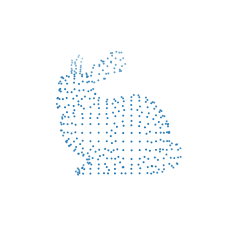

In [29]:
# Single View
ax = plt.axes(projection='3d')
ax.view_init(90, -90)
ax.axis("off")
ax.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

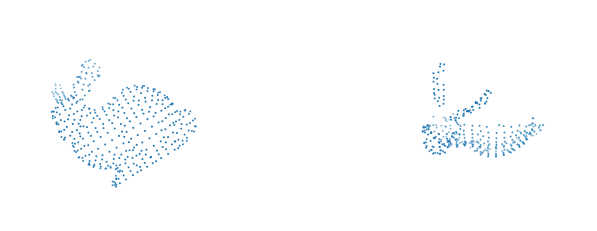

In [30]:
# Multi View
figsize = plt.rcParams.get('figure.figsize')
fig = plt.figure(figsize=(figsize[0] * 2, figsize[1]))
ax1 = fig.add_subplot(1, 2, 1, projection = '3d')
ax2 = fig.add_subplot(1, 2, 2, projection = '3d')
ax1.axis("off")
ax1.view_init(90, -120) # front view
ax1.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
ax2.axis("off")
ax2.view_init(90 + 90, -90) # top view
ax2.scatter(points[:,0], points[:,1], points[:,2], s=1, c=colors)
plt.show()

**PLOTLY** fichier .obj


In [31]:
import plotly.graph_objects as go

In [33]:
points = np.asarray(Pcloud.points)

In [34]:
fig = go.Figure(
    data=[
        go.Scatter3d(
            x=points[:,0], y=points[:,1], z=points[:,2], 
            mode='markers',
            marker=dict(size=1, color=colors)
        )
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

In [36]:
!wget https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj

--2023-03-08 19:32:03--  https://graphics.stanford.edu/~mdfisher/Data/Meshes/bunny.obj
Resolving graphics.stanford.edu (graphics.stanford.edu)... 171.67.77.70
Connecting to graphics.stanford.edu (graphics.stanford.edu)|171.67.77.70|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205917 (201K) [text/plain]
Saving to: ‘bunny.obj.1’

bunny.obj.1         100%[===================>] 201.09K   167KB/s    in 1.2s    

2023-03-08 19:32:05 (167 KB/s) - ‘bunny.obj.1’ saved [205917/205917]



In [37]:
mesh = o3d.io.read_triangle_mesh("bunny.obj")
if mesh.is_empty(): exit()

In [38]:
if not mesh.has_vertex_normals(): mesh.compute_vertex_normals()
if not mesh.has_triangle_normals(): mesh.compute_triangle_normals()

In [39]:
triangles = np.asarray(mesh.triangles)
vertices = np.asarray(mesh.vertices)
colors = None
if mesh.has_triangle_normals():
    colors = (0.5, 0.5, 0.5) + np.asarray(mesh.triangle_normals) * 0.5
    colors = tuple(map(tuple, colors))
else:
    colors = (1.0, 0.0, 0.0)

In [40]:
fig = go.Figure(
    data=[
        go.Mesh3d(
            x=vertices[:,0],
            y=vertices[:,1],
            z=vertices[:,2],
            i=triangles[:,0],
            j=triangles[:,1],
            k=triangles[:,2],
            facecolor=colors,
            opacity=0.50)
    ],
    layout=dict(
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )
)
fig.show()